#### **1. Loading Dataset and Import Library**

In [153]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocess 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
from numpy.random.bit_generator import SeedlessSeedSequence
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from xgboost import XGBClassifier 
from sklearn import metrics
from collections import Counter

In [154]:
# Loading dataset
df = pd.read_csv("dataset/train.csv")

In [155]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [156]:
# Drop the unneccesary columns
df.drop(["Unnamed: 0", "id"], axis=1, inplace=True)
df.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [157]:
def des_anal(dataFrame):
    print("-------------------------------Shape---------------------------")
    print(f"{dataFrame.shape}\n\n")
    print("-------------------------------Columns-------------------------")
    print(f"{dataFrame.columns}\n\n")
    print("-------------------------------Desciptive-------------------------")
    print(f"{dataFrame.info()}\n\n")
    print("-------------------------------Null values-------------------------")
    print(f"{dataFrame.isnull().sum()}\n\n")
    print("-------------------------------Unique Values-------------------------")
    print(f"{dataFrame.nunique()}\n\n")
    print("-------------------------------Duplicated----------------------------")
    print(f"{dataFrame.duplicated().sum()}\n\n")

des_anal(df)

-------------------------------Shape---------------------------
(103904, 23)


-------------------------------Columns-------------------------
Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


-------------------------------Desciptive-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender     

*`Arrival Delay in Minutes` Column has 310 nan*

##### Features Classification: Categorical vs Numerical

In [158]:
df.tail(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,Male,Loyal Customer,27,Business travel,Business,1723,1,3,3,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


1. Numerical Features
- `Age`
- `Flight Distance`
- `Inflight wifi service`
- `Departure/Arrival time convenient`
- `Ease of Online booking`
- `Gate location`
- `Food and drink`
- `Online boarding`
- `Seat comfort`
- `Inflight entertainment`
- `On-board service`
- `Leg room service`
- `Baggage handling`
- `Checkin service`
- `Inflight service`
- `Cleanliness`
- `Departure Delay in Minutes`
- `Arrival Delay in Minutes`


2. Categorical Features

*Ordinal*

- `Gender`
- `Customer Type`
- `Type of Travel`
- `Class`
- `satisfaction`


In [159]:
# Convert type of satisfaction columns to category type
df["satisfaction"] = df["satisfaction"].astype("category")

In [160]:
cat_features = ["Gender", "Customer Type", "Type of Travel", "Class"]
for feature in cat_features:
    df[feature] = df[feature].astype("category")

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  int64   
 7   Departure/Arrival time convenient  103904 non-null  int64   
 8   Ease of Online booking             103904 non-null  int64   
 9   Gate location                      103904 non-null  int64   
 10  Food and drink                     103904 non-null  int64   
 11  Online boarding           

##### Distribution of Numerical Features

In [162]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


C:\Users\DELL\AppData\Local\Temp\ipykernel_2924\3542898910.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues);


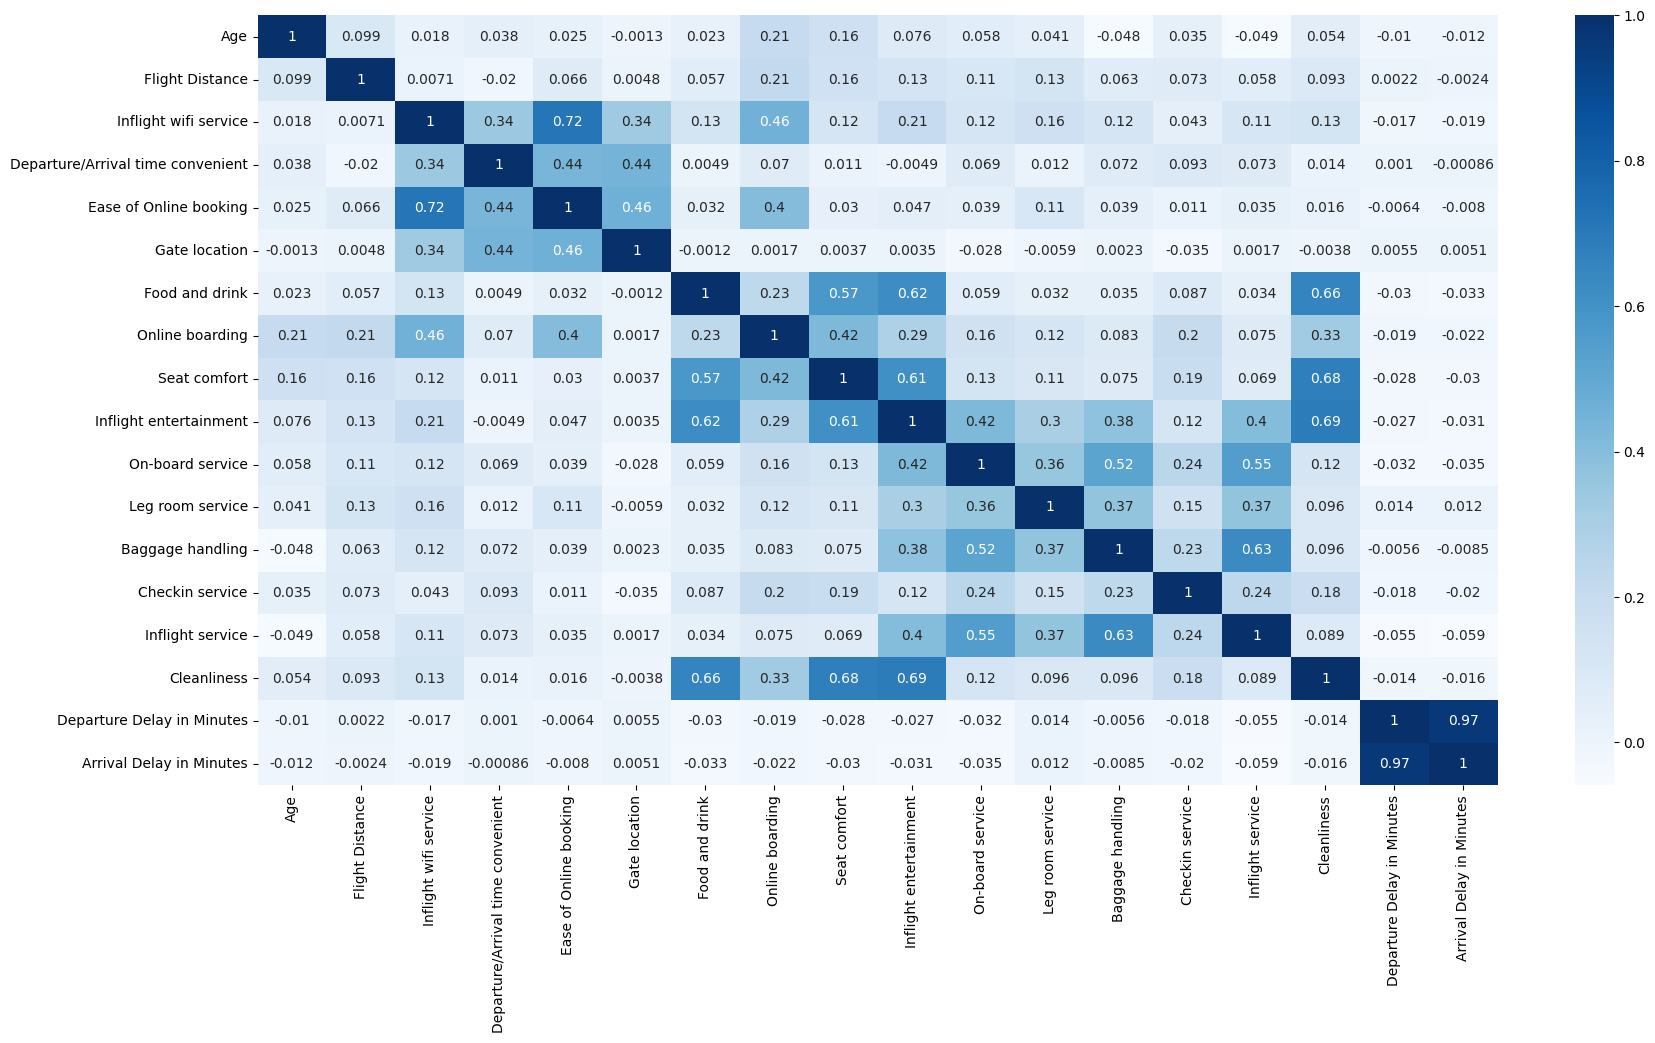

In [163]:
# Drawing the correlation diagram
plt.figure(figsize=(20, 10), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Blues);
plt.show();

##### Distribution of Categorical Features

In [164]:
df.describe(include="category")

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


#### **2. EDA**

##### 2.1 Correlating categorical features

Target Variable: `satisfaction`

In [165]:
df["satisfaction"].value_counts().to_frame()

,satisfaction
neutral or dissatisfied,58879
satisfied,45025


In [166]:
df["satisfaction"].value_counts(normalize=True).to_frame()

,satisfaction
neutral or dissatisfied,0.566667
satisfied,0.433333


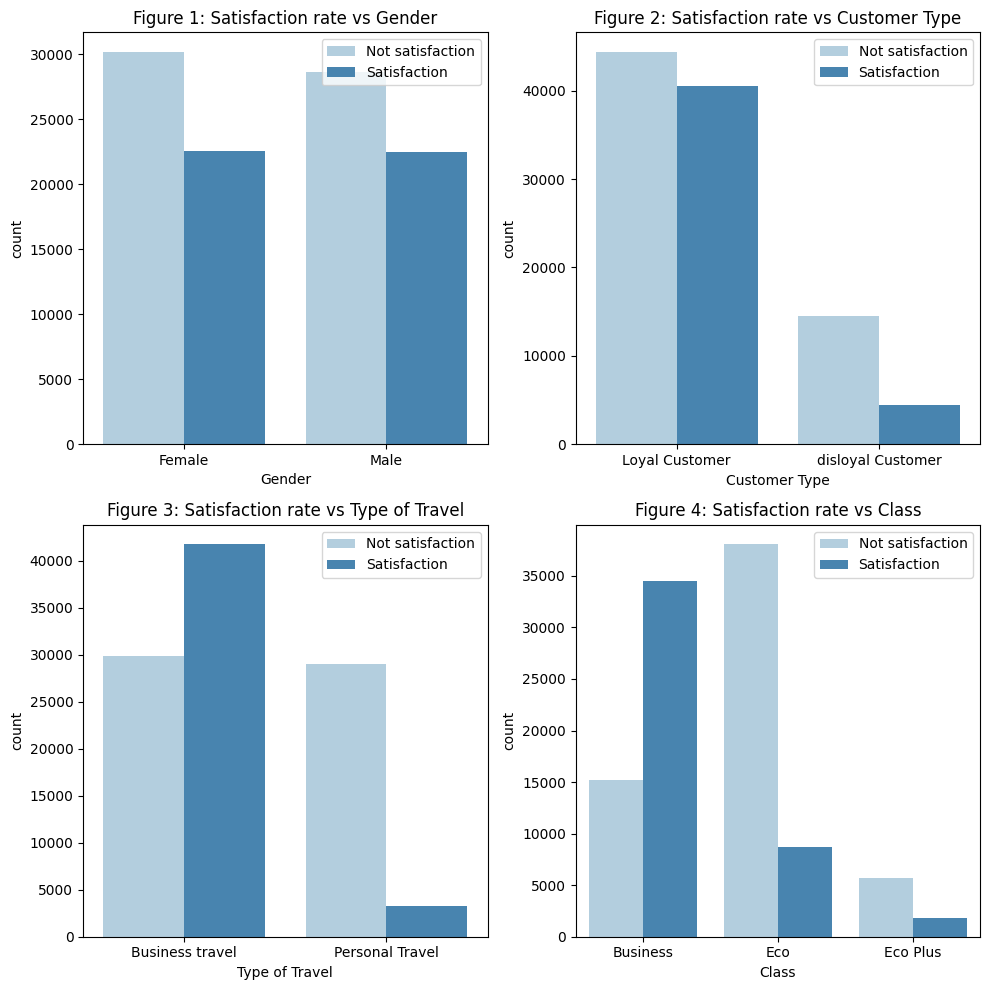

In [167]:
n_rows = 2
n_cols = 2

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 5))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        i = r * n_cols + c
        if i < len(cat_features):
            ax_i = ax[r, c]
            sns.countplot(data=df, x= cat_features[i], hue="satisfaction", palette="Blues", ax=ax_i)
            ax_i.set_title(f"Figure {i + 1}: Satisfaction rate vs {cat_features[i]}")
            ax_i.legend(title="", loc="upper right", labels=["Not satisfaction", "Satisfaction"])

plt.tight_layout()
plt.show()

Observation
* Fig 1: The Not satisfaction rate in both male and female is larger
* Fig 2: The Loyer Customer tend to more satisfied than the disloyer customer 
* Fig 3: The Business Travel has satisfaction rate larger than not satisfaction rate, but most personal travels are not satisfied
* Fig 4: The Business class has satisfaction rate larger than not satisfaction rate, but others class are almost satisfied 

##### 2.2. EDA for Numerical Features

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  int64   
 7   Departure/Arrival time convenient  103904 non-null  int64   
 8   Ease of Online booking             103904 non-null  int64   
 9   Gate location                      103904 non-null  int64   
 10  Food and drink                     103904 non-null  int64   
 11  Online boarding           

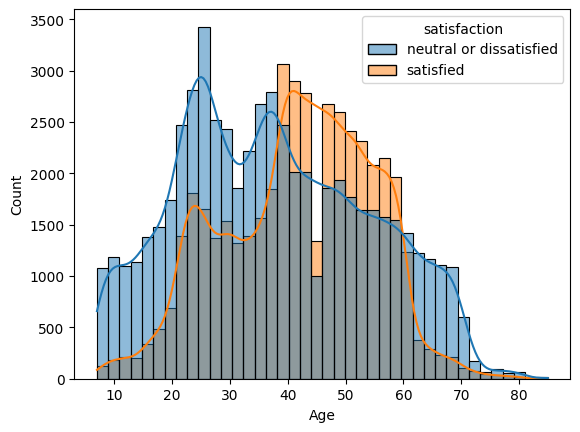

In [169]:
num_features = ["Age", 
                "Flight Distance", 
                "Inflight wifi service", 
                "Departure/Arrival time convenient", 
                "Ease of Online booking", 
                "Gate location",
                "Food and drink",
                "Online boarding",
                "Seat comfort",
                "Inflight entertainment",
                "On-board service",
                "Leg room service",
                "Baggage handling",
                "Checkin service",
                "Inflight service",
                "Cleanliness",
                "Departure Delay in Minutes",
                "Arrival Delay in Minutes"
]

sns.histplot(data = df, x = 'Age', hue = 'satisfaction', bins = 40, kde = True);

The younger passengers (8 - 38) tend to be more dissatisfied than the older passengers (40 - 80+)

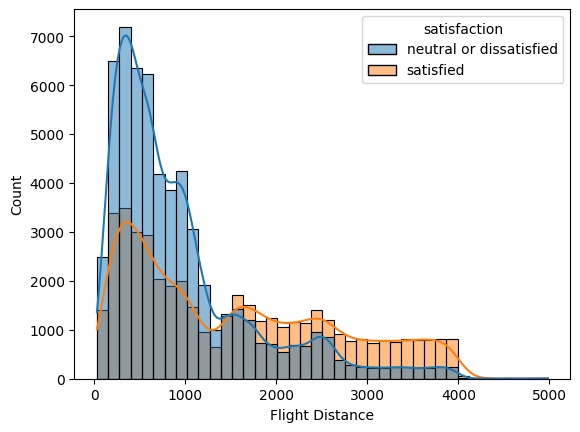

In [170]:
sns.histplot(data = df, x = 'Flight Distance', hue = 'satisfaction', bins = 40, kde = True);

Closer flights (0-1000+) tend to receive more dissatisfaction than long flights (1500-5000)

#### **3. Filing missing value**

In [171]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [172]:
x = df.drop("satisfaction", axis=1)
y = df["satisfaction"]

In [173]:
x.head(5)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,5,4,3,4,4,5,5,25,18.0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,1,5,3,1,4,1,1,6.0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,5,4,3,4,4,4,5,0,0.0
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,2,5,3,1,4,2,11,9.0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,5,3,3,4,4,3,3,3,0,0.0


In [174]:
y.head(5)

0    neutral or dissatisfied
1    neutral or dissatisfied
2                  satisfied
3    neutral or dissatisfied
4                  satisfied
Name: satisfaction, dtype: category
Categories (2, object): ['neutral or dissatisfied', 'satisfied']

In [175]:
# Preprocessing
num_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scale", StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_transformer, num_features),
    ("cat", cat_transformer, cat_features)
])

x = preprocessor.fit_transform(x)

In [176]:
x.shape

(103904, 27)

In [177]:
df.describe(include="category")

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [178]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [179]:
y.shape

(103904,)

In [180]:
print(y[0:100])

[0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 1 1 0 0 0
 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 0 0 1]


#### **Model Training**

In [181]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [182]:
x_train.shape

(83123, 27)

##### Decision Tree

In [183]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [184]:
dt_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(dt_accuracy))

Accuracy: 0.9483662961358934


In [185]:
# Fiding the best hyperparemeter
parameters = {
    "max_depth": range(1, 20),
    "splitter": ["best", "random"]
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
grid_dt = GridSearchCV(
    estimator=dt, # Model
    param_grid=parameters,
    scoring="accuracy", # Strategy to evaluate the performance of the cross-validated model on the test set
    # if it is a multiclass target, use f1_micro
    # f1 or roc_auc doesn't work with multiclass targets
    # f1_micro and accuracy were OK here
    cv=cv, # cross-validation generator
    verbose=1, # Time to calculate
    n_jobs=-1
)

grid_dt.fit(x_train, y_train)

Fitting 10 folds for each of 38 candidates, totalling 380 fits


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 20),
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [186]:
grid_dt.best_params_

{'max_depth': 14, 'splitter': 'best'}

In [187]:
# Building the model with the best hyperparameters
dt = DecisionTreeClassifier(
    max_depth=14,
    splitter="best",
    random_state=0
)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [189]:
# Building the model with the best hyperparameters
dt = DecisionTreeClassifier(
    max_depth=8,
    splitter="best",
    random_state=0
)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

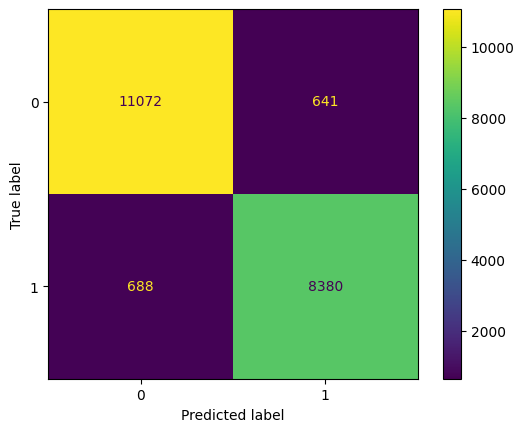

In [192]:
# The confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [196]:
# The classification report
target_names = ["dissatisfaction", "satisfaction"]
print(classification_report(y_test, y_pred, target_names=target_names))

                 precision    recall  f1-score   support

dissatisfaction       0.94      0.95      0.94     11713
   satisfaction       0.93      0.92      0.93      9068

       accuracy                           0.94     20781
      macro avg       0.94      0.93      0.93     20781
   weighted avg       0.94      0.94      0.94     20781



##### Suport vector machine

In [198]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
svm = DecisionTreeClassifier(random_state=42)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
svm_accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", svm_accuracy)

Accuracy: 0.9483662961358934
